# Библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import pickle

# Загрузка данных

In [215]:
df = pd.read_csv('../data/train.csv')
print("Размер датасета:", df.shape)

Размер датасета: (2000, 21)


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [85]:
print(df['price_range'].value_counts())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [86]:
numeric_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
                   'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
                   'sc_h', 'sc_w', 'talk_time']

nominal_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

target = 'price_range'

Датасет содержит 2000 записей и 21 признак, описывающий технические характеристики мобильных телефонов:

```battery_power``` — ёмкость батареи в мАч,

```blue``` — наличие Bluetooth,

```clock_speed``` — частота процессора,

```dual_sim``` — поддержка двух SIM-карт,

```fc``` и ```pc``` — мегапиксели фронтальной и основной камер,

```four_g```, ```three_g``` — поддержка 4G и 3G,

```int_memory``` — объём внутренней памяти,

```m_dep``` — толщина телефона в сантиметрах,

```mobile_wt``` — вес телефона,

```n_cores``` — количество ядер процессора,

```px_height``` и ```px_width``` — разрешение экрана по высоте и ширине в пикселях,

```ram``` — объем оперативной памяти в мегабайтах,

```sc_h``` и ```sc_w``` — высота и ширина экрана в сантиметрах,

```talk_time``` — максимальное время разговора от одного заряда батареи,

```touch_screen``` — сенсорный экран,

```wifi``` — наличие Wi-Fi.

Целевая переменная — ```price_range```, с категориями от 0 до 3, соответствующими бюджетному, низко-среднему, средне-высокому и премиум сегментам соответственно.


# Очистка данных

In [216]:
df = df[df['battery_power'] > 0]
df = df[df['clock_speed'] > 0]
df = df[df['int_memory'] > 0]
df = df[df['m_dep'] > 0]

df = df[df['mobile_wt'] > 50]
df = df[df['px_height'] >= 50]
df = df[df['px_width'] >= 20]
df = df[df['px_width'] >= df['px_width']]
df = df[df['sc_w'] < df['sc_h']]

Приведем номинальные признаки к типу int8

In [217]:
for c in nominal_features:
    df[c] = df[c].astype('int8')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1935 entries, 1 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1935 non-null   int64  
 1   blue           1935 non-null   int8   
 2   clock_speed    1935 non-null   float64
 3   dual_sim       1935 non-null   int8   
 4   fc             1935 non-null   int64  
 5   four_g         1935 non-null   int8   
 6   int_memory     1935 non-null   int64  
 7   m_dep          1935 non-null   float64
 8   mobile_wt      1935 non-null   int64  
 9   n_cores        1935 non-null   int64  
 10  pc             1935 non-null   int64  
 11  px_height      1935 non-null   int64  
 12  px_width       1935 non-null   int64  
 13  ram            1935 non-null   int64  
 14  sc_h           1935 non-null   int64  
 15  sc_w           1935 non-null   int64  
 16  talk_time      1935 non-null   int64  
 17  three_g        1935 non-null   int8   
 18  touch_screen 

In [218]:
df.shape

(1935, 21)

В датасете было 65 невалидных записей 

# Анализ признаков для модели

## Общее распределение данных (boxplot)

In [89]:
fig = go.Figure()

for col in numeric_features:
    fig.add_trace(go.Box(y=df[col], name=col))

fig.update_layout(
    title='Диаграммы Тьюки',
    xaxis_tickangle=-45,
    width=1500,
    height=800
)

fig.write_image('numeric_features_boxplot.png')

fig.show()

### Вывод

Данные распределены неравномерно, сильно выделяются `battery_power`, `px_{height,width}`, rawm. Эти признаки имеют гораздо больший разброс значений.

Признаки `fc`, `px_height` имеют выбросы (значения, превышающие 1.5 "межквартильных расстояния", где межквартильное расстояние - разность между значением квартилем 3 и квартилем 1)


In [227]:
cur_df = df

## Корреляция

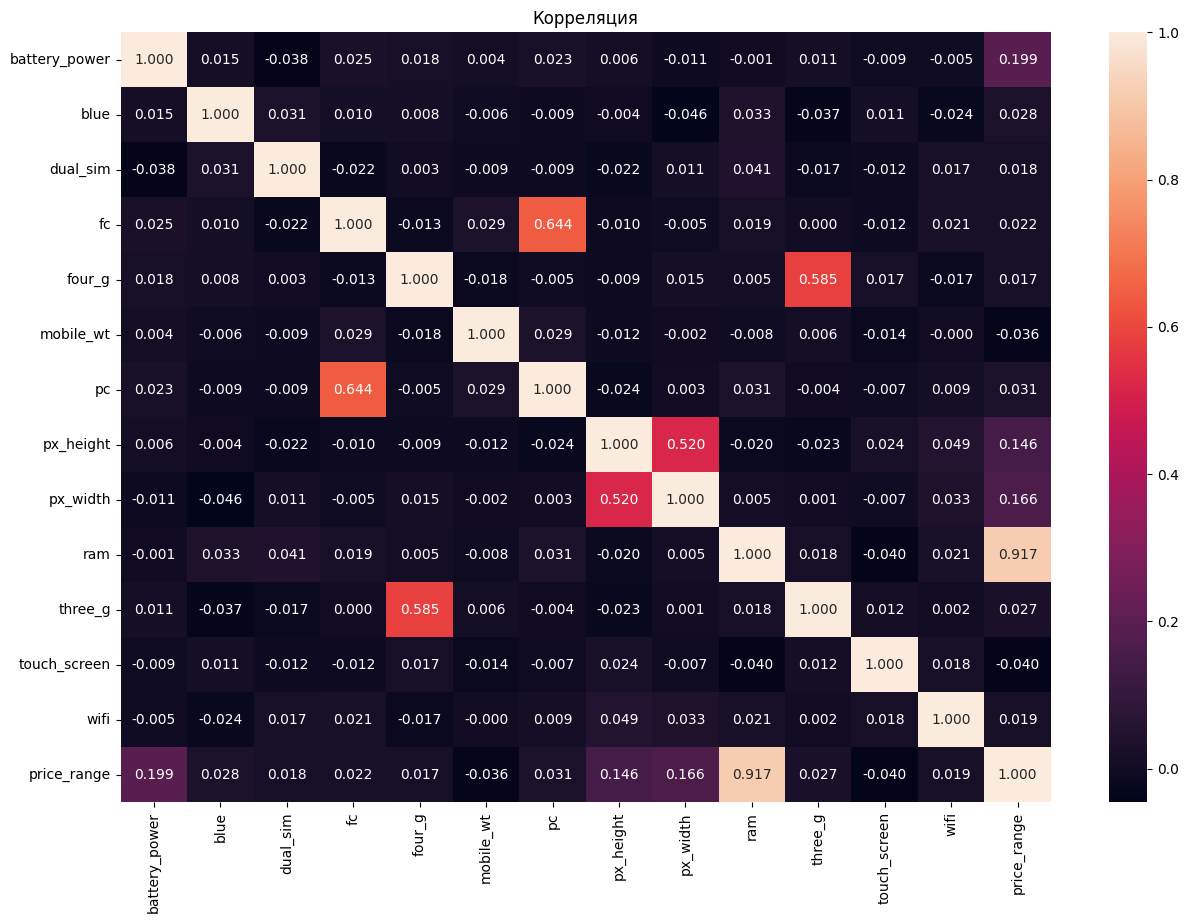

In [180]:
plt.figure(figsize=(15, 10))
correlation_matrix = cur_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f')
plt.title('Корреляция')
# plt.savefig('correlation.png')
plt.show()

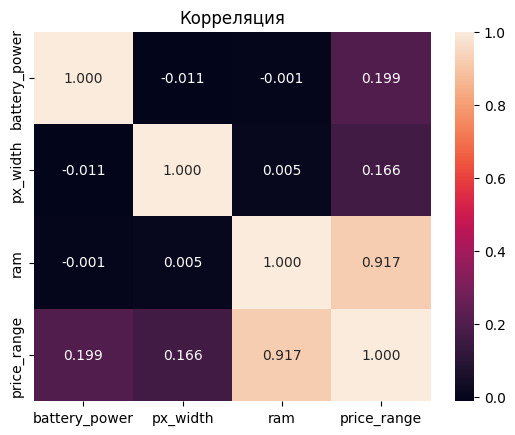

In [193]:
threshold_mask = np.abs(correlation_matrix['price_range']) > .15
features_to_drop = correlation_matrix.columns[~threshold_mask].tolist()

sns.heatmap(correlation_matrix.drop(index=features_to_drop, columns=features_to_drop), annot=True, fmt='.3f')
plt.title('Корреляция')
plt.savefig('correlation_thresholded.png')
plt.show()

### Вывод
Наибольшую корреляцию с ценой имеют `RAM` (0.917), `battery_power` (0.199), `px_width` (0.166) и `px_height` (0.146).

## Рапределение данных конкретного признака по целевой переменной

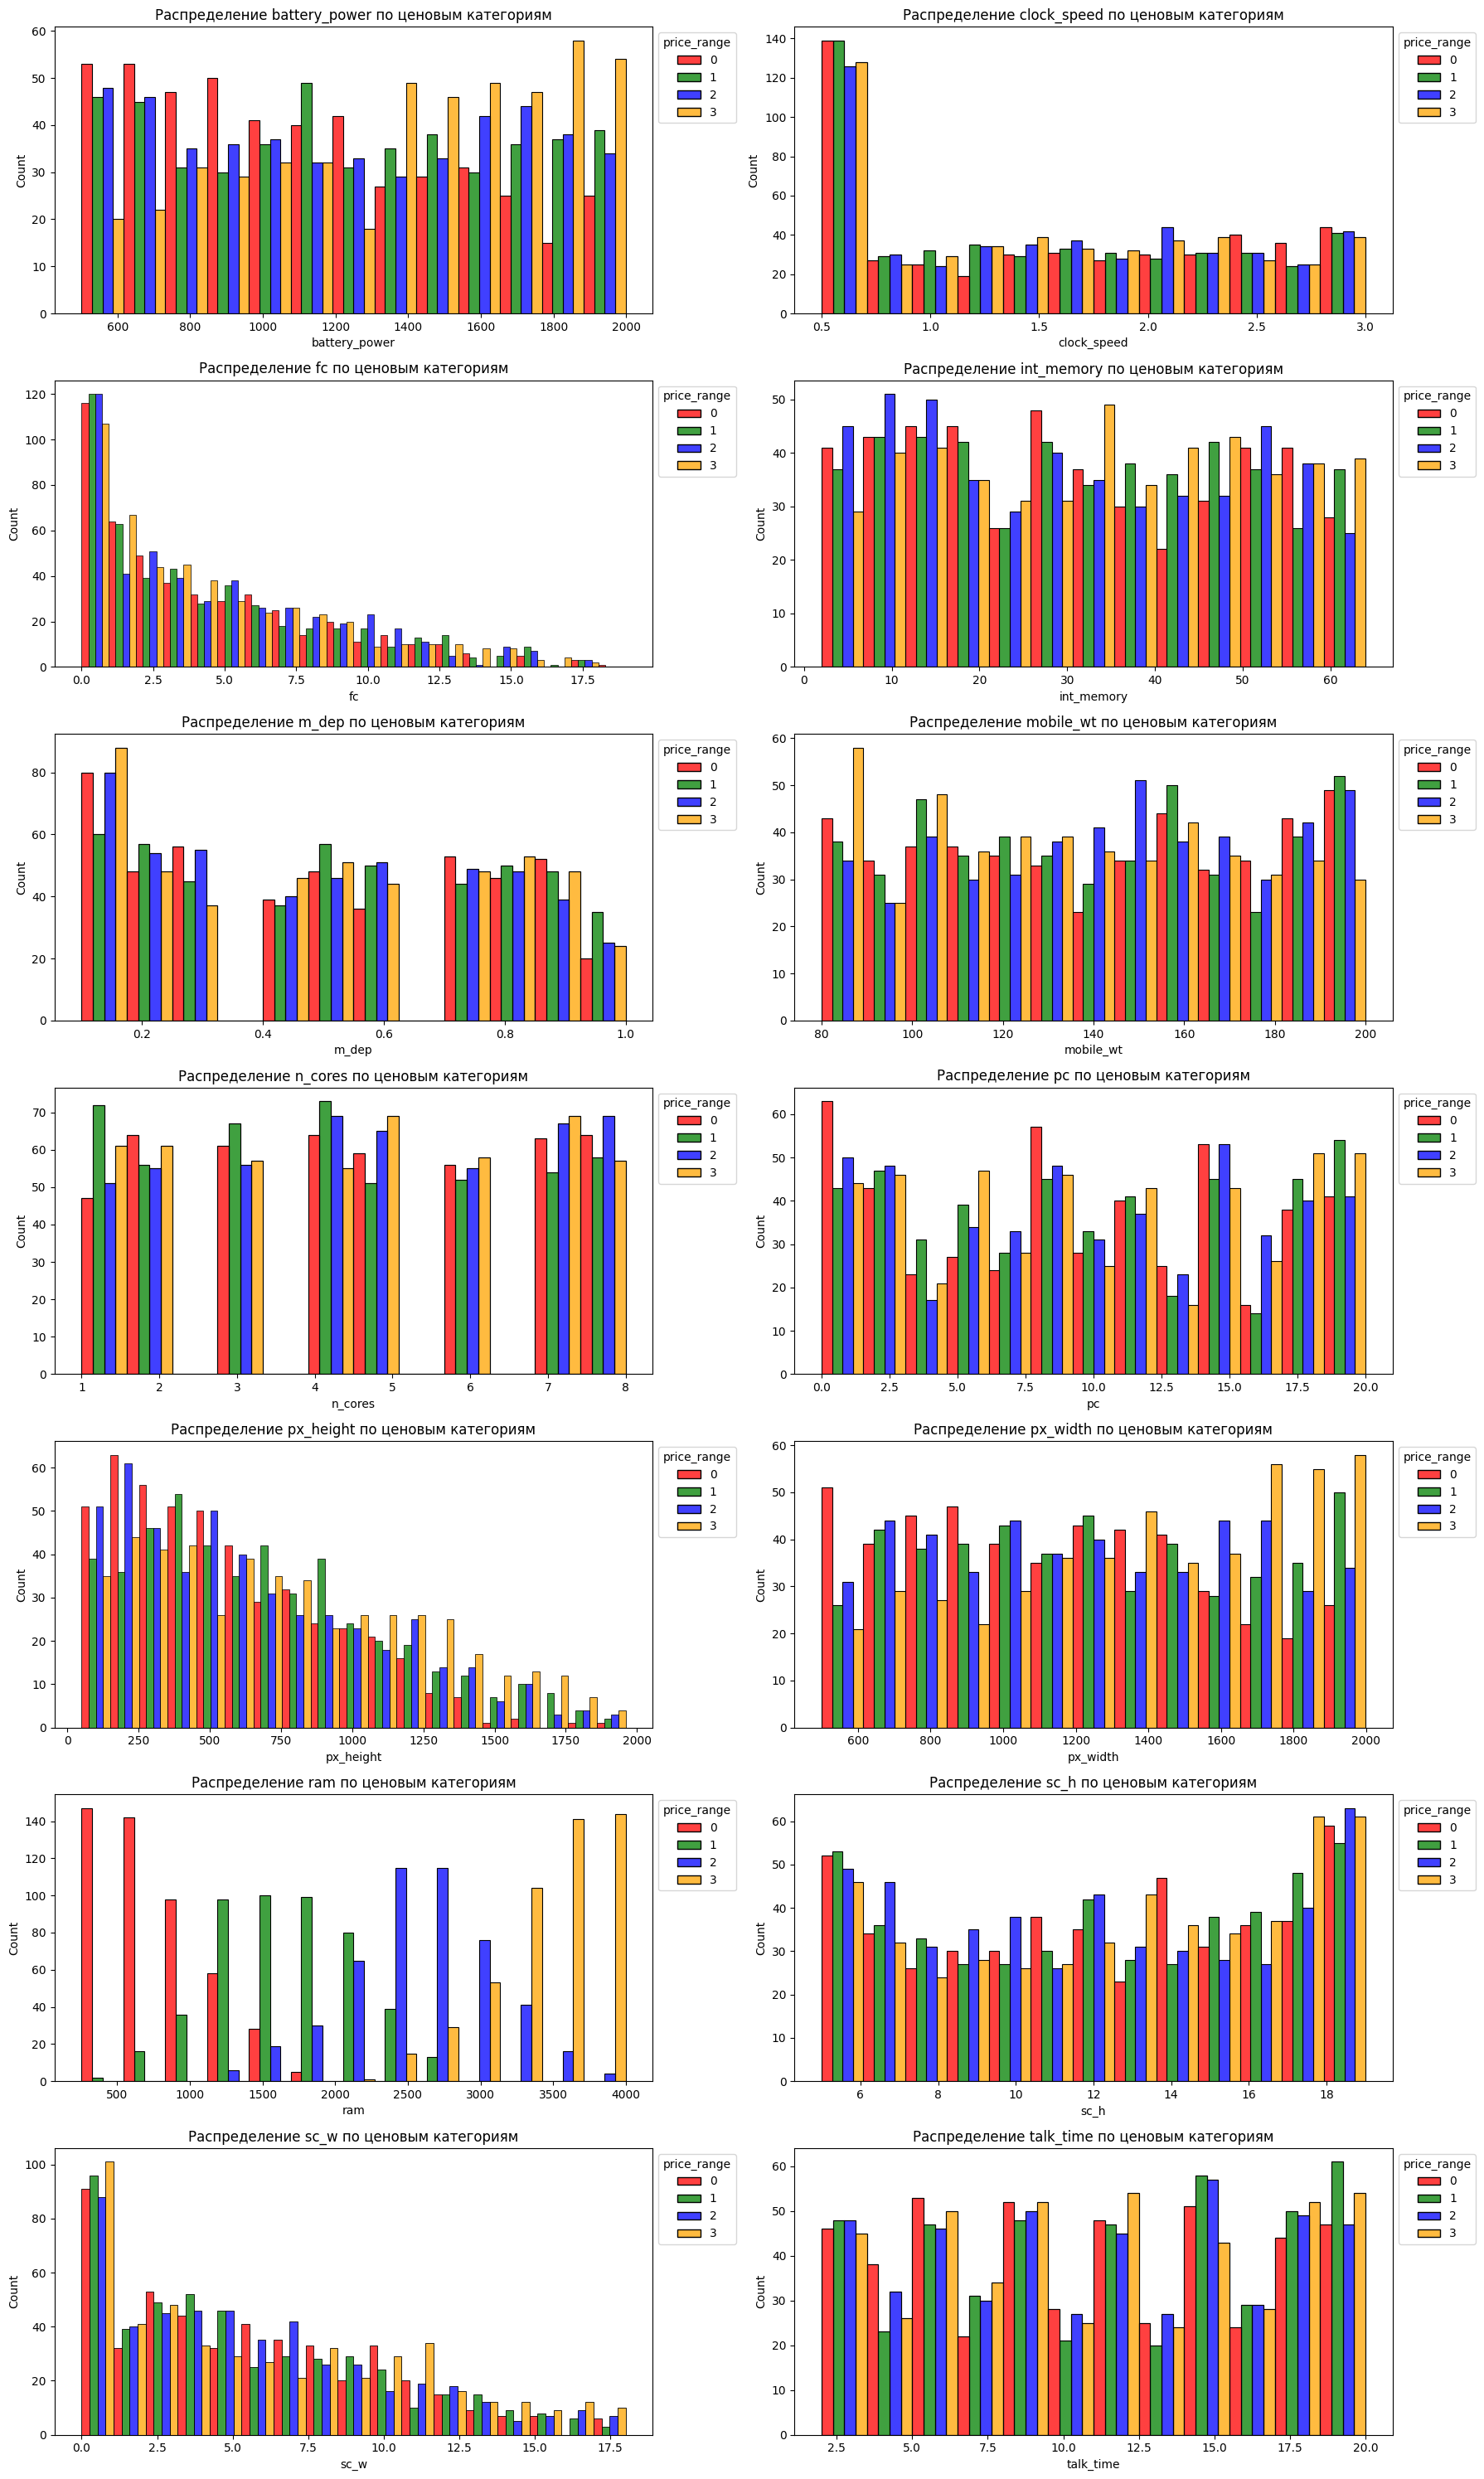

In [ ]:
n_rows = 2
fig, axes = plt.subplots(len(numeric_features) // n_rows, n_rows, figsize=(9 * n_rows, 30))

for i, col in enumerate(numeric_features):
    # sizes = df[col].value_counts()
    i, j = divmod(i, n_rows)
    sns.histplot(
        x=cur_df[col],
        hue=cur_df['price_range'],
        ax=axes[i][j],
        palette={0: 'red', 1: 'green', 2: 'blue', 3: 'orange'},
        multiple='dodge')
    axes[i][j].set_title(f'Распределение {col} по ценовым категориям')
    # axes[i][j].set_xlabel(col)
    # axes[i][j].set_ylabel('Ценовая категория')
    sns.move_legend(axes[i][j], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
# plt.savefig('features_dist.png')
plt.show()



### Вывод
- Признаки `clock_speed`, `fc`, `int_memory`, `m_deep`, `n_cores`, `sc_h`, `sc_w`, `talk_time` зрительно не различимы относительно целевой переменной и не имеют корреляции с ней, и могут быть исключены из рассмотрения.
- Признак `ram` позволяет разделить большую часть данных.
- `battery_power` для ценовой категории 3 имеет больше экзепляров с большим значением этого признака. Также для ценовой категории 0 признак имеет больше низких показателей.
- С увеличением `px_width` увеличивается количество экземпляров из категории 3
- Малое число телефонов из выборки имеют хорошую фронтальную камеру

In [ ]:
df = df.drop(['clock_speed', 'int_memory', 'm_dep', 'n_cores', 'talk_time'], axis=1)
df

KeyError: "['clock_speed', 'int_memory', 'm_dep', 'n_cores', 'talk_time'] not found in axis"

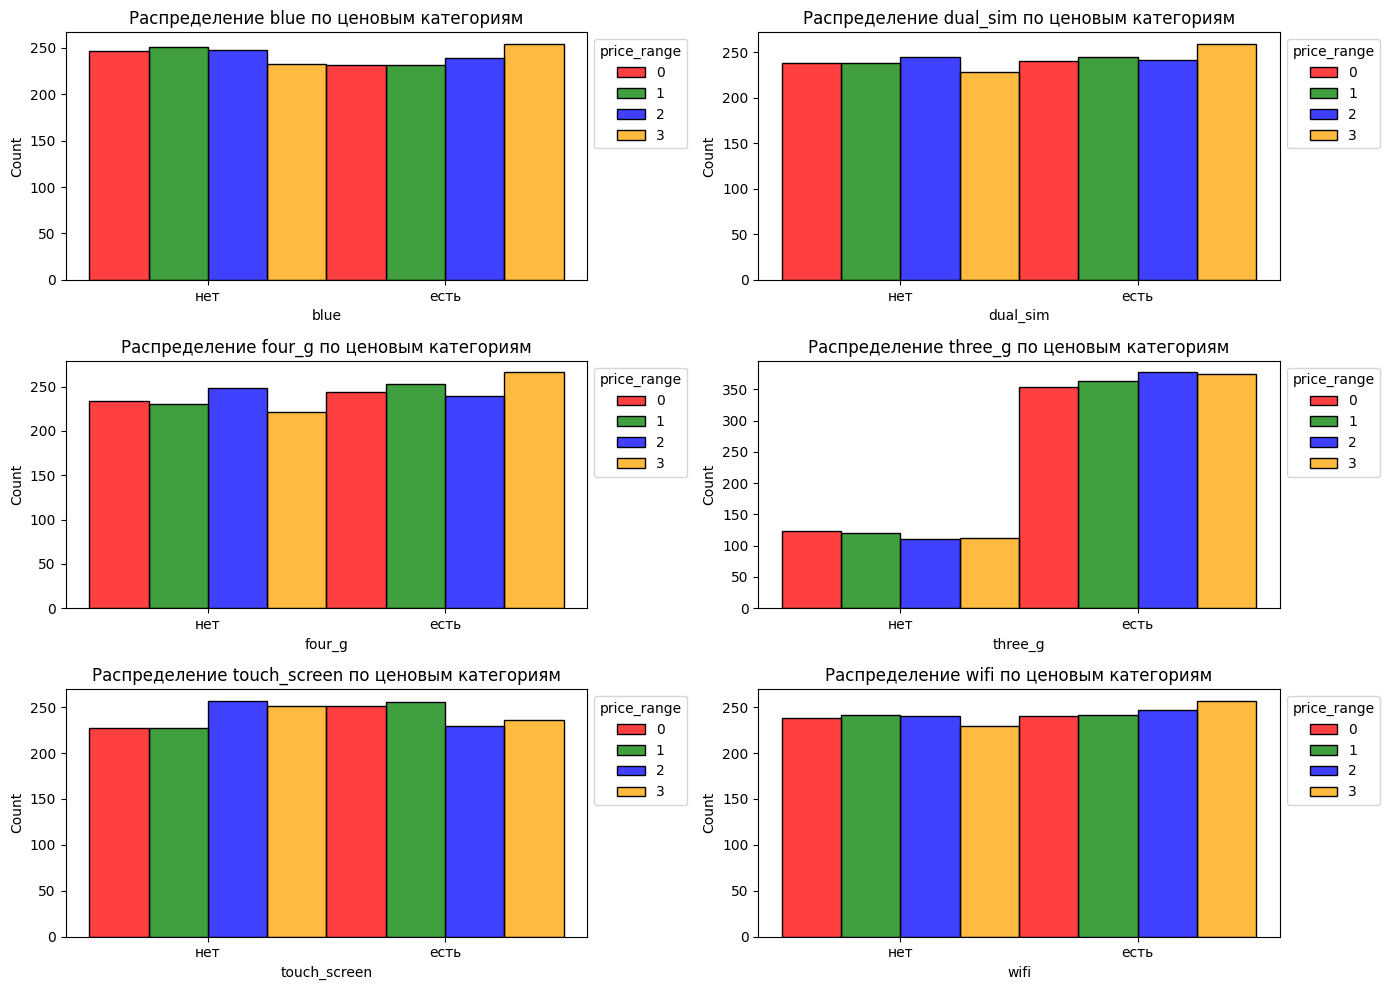

In [228]:
n_rows = 2
fig, axes = plt.subplots(len(nominal_features) // n_rows, n_rows, figsize=(7 * n_rows, 10))
for i, col in enumerate(nominal_features):
    i, j = divmod(i, n_rows)
    sns.histplot(
        x=cur_df[col],
        ax=axes[i][j],
        discrete=True,
        hue=cur_df['price_range'],
        multiple='dodge',
        palette={0: 'red', 1: 'green', 2: 'blue', 3: 'orange'},
    )
    axes[i][j].set_title(f'Распределение {col} по ценовым категориям')
    axes[i][j].set_xlabel(col)
    sns.move_legend(axes[i][j], loc='upper left', bbox_to_anchor=(1, 1))
    axes[i][j].set_xticks([0, 1])
    axes[i][j].set_xticklabels(['нет', "есть"])

plt.tight_layout()
plt.savefig('nominal_features.png')
plt.show()

### Вывод
Все номинальные признаки распределны равномерно по ценовым категориям

## Выявление флагманов

In [220]:
all_nominal_mask = df[nominal_features].all(axis=1)
cur_df = df[all_nominal_mask]
research_features = [f for f in numeric_features if f in cur_df]

<Axes: xlabel='price_range', ylabel='Count'>

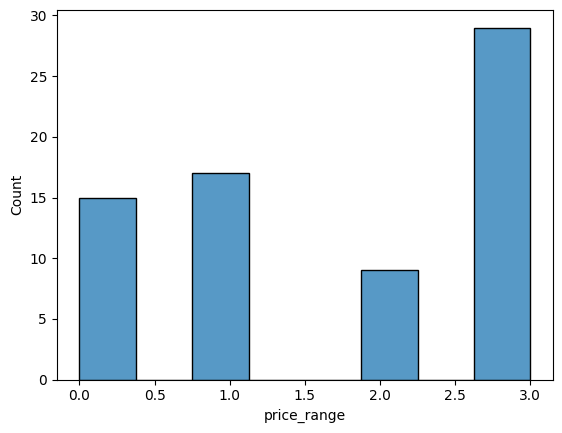

In [221]:
sns.histplot(x=cur_df['price_range'])

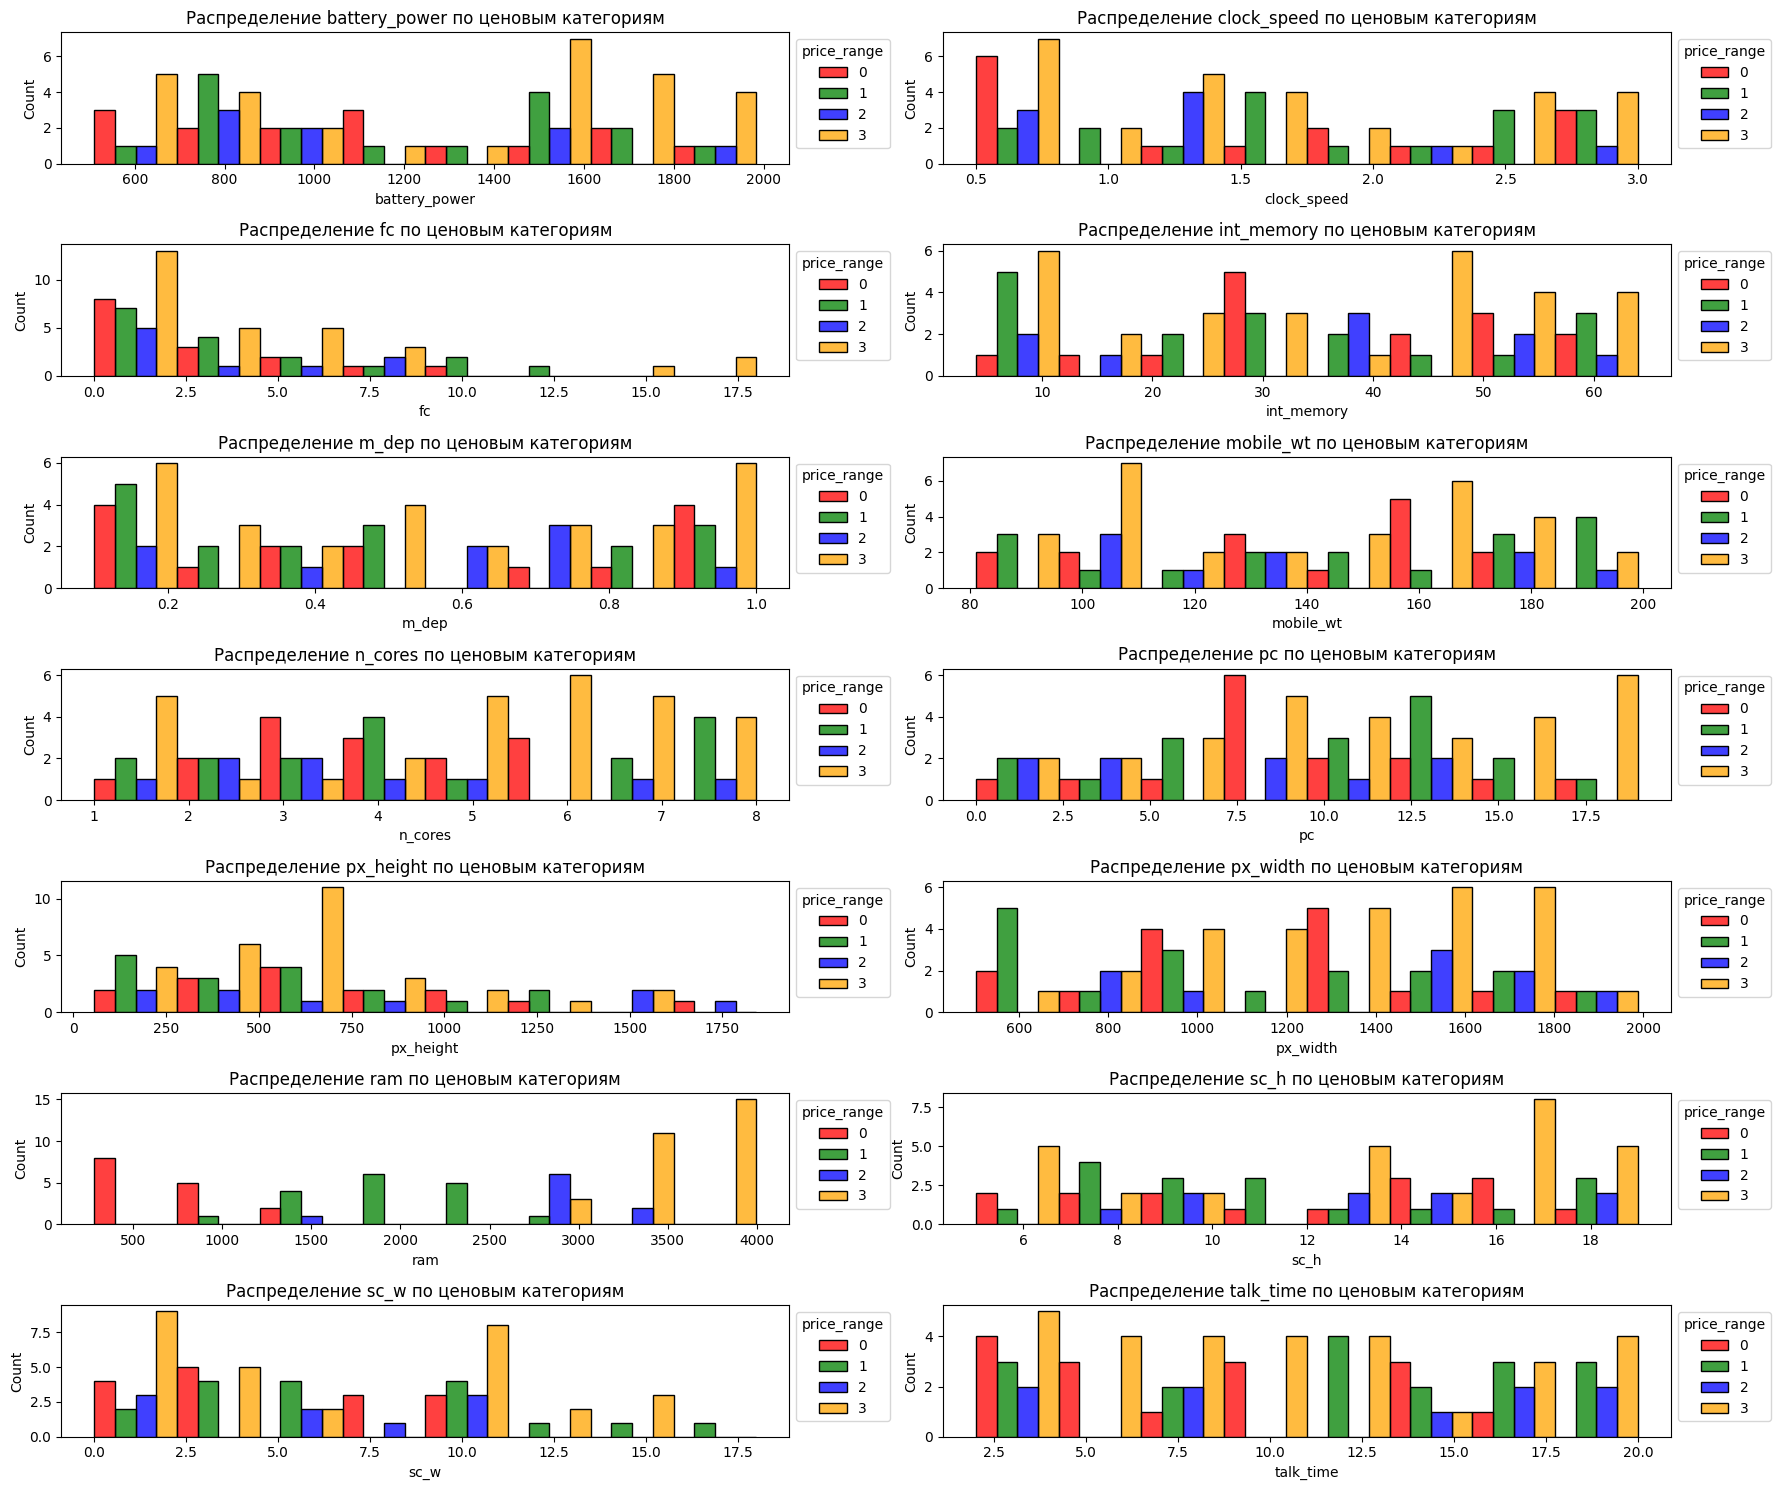

In [ ]:
n_rows = 2
n_cols, extra = divmod(len(research_features), n_rows)
if extra:
    n_cols += 1
fig, axes = plt.subplots(
    n_cols, n_rows, figsize=(9 * n_rows, 15)
)

for i, col in enumerate(research_features):
    i, j = divmod(i, n_rows)
    sns.histplot(
        x=cur_df[col],
        hue=cur_df['price_range'],
        ax=axes[i][j],
        palette={0: 'red', 1: 'green', 2: 'blue', 3: 'orange'},
        multiple='dodge')
    axes[i][j].set_title(f'Распределение {col} по ценовым категориям')
    sns.move_legend(axes[i][j], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
# plt.savefig('flagman_dist.png')
plt.show()

### Вывод
Флагман ценовой категории 3 в среднем можно описать так:
- высоким `battery_power`
- низким `fc`
- высоким `pc`
- `px_height` от 250 до 750
- `ram` более 3000
- `px_width` от 1000 до 2000

## Выявление моделей с минимальным функционалом

In [223]:
empty_nominal_mask = ~df[nominal_features].any(axis=1)
cur_df = df[empty_nominal_mask]
research_features = [f for f in numeric_features if f in cur_df]

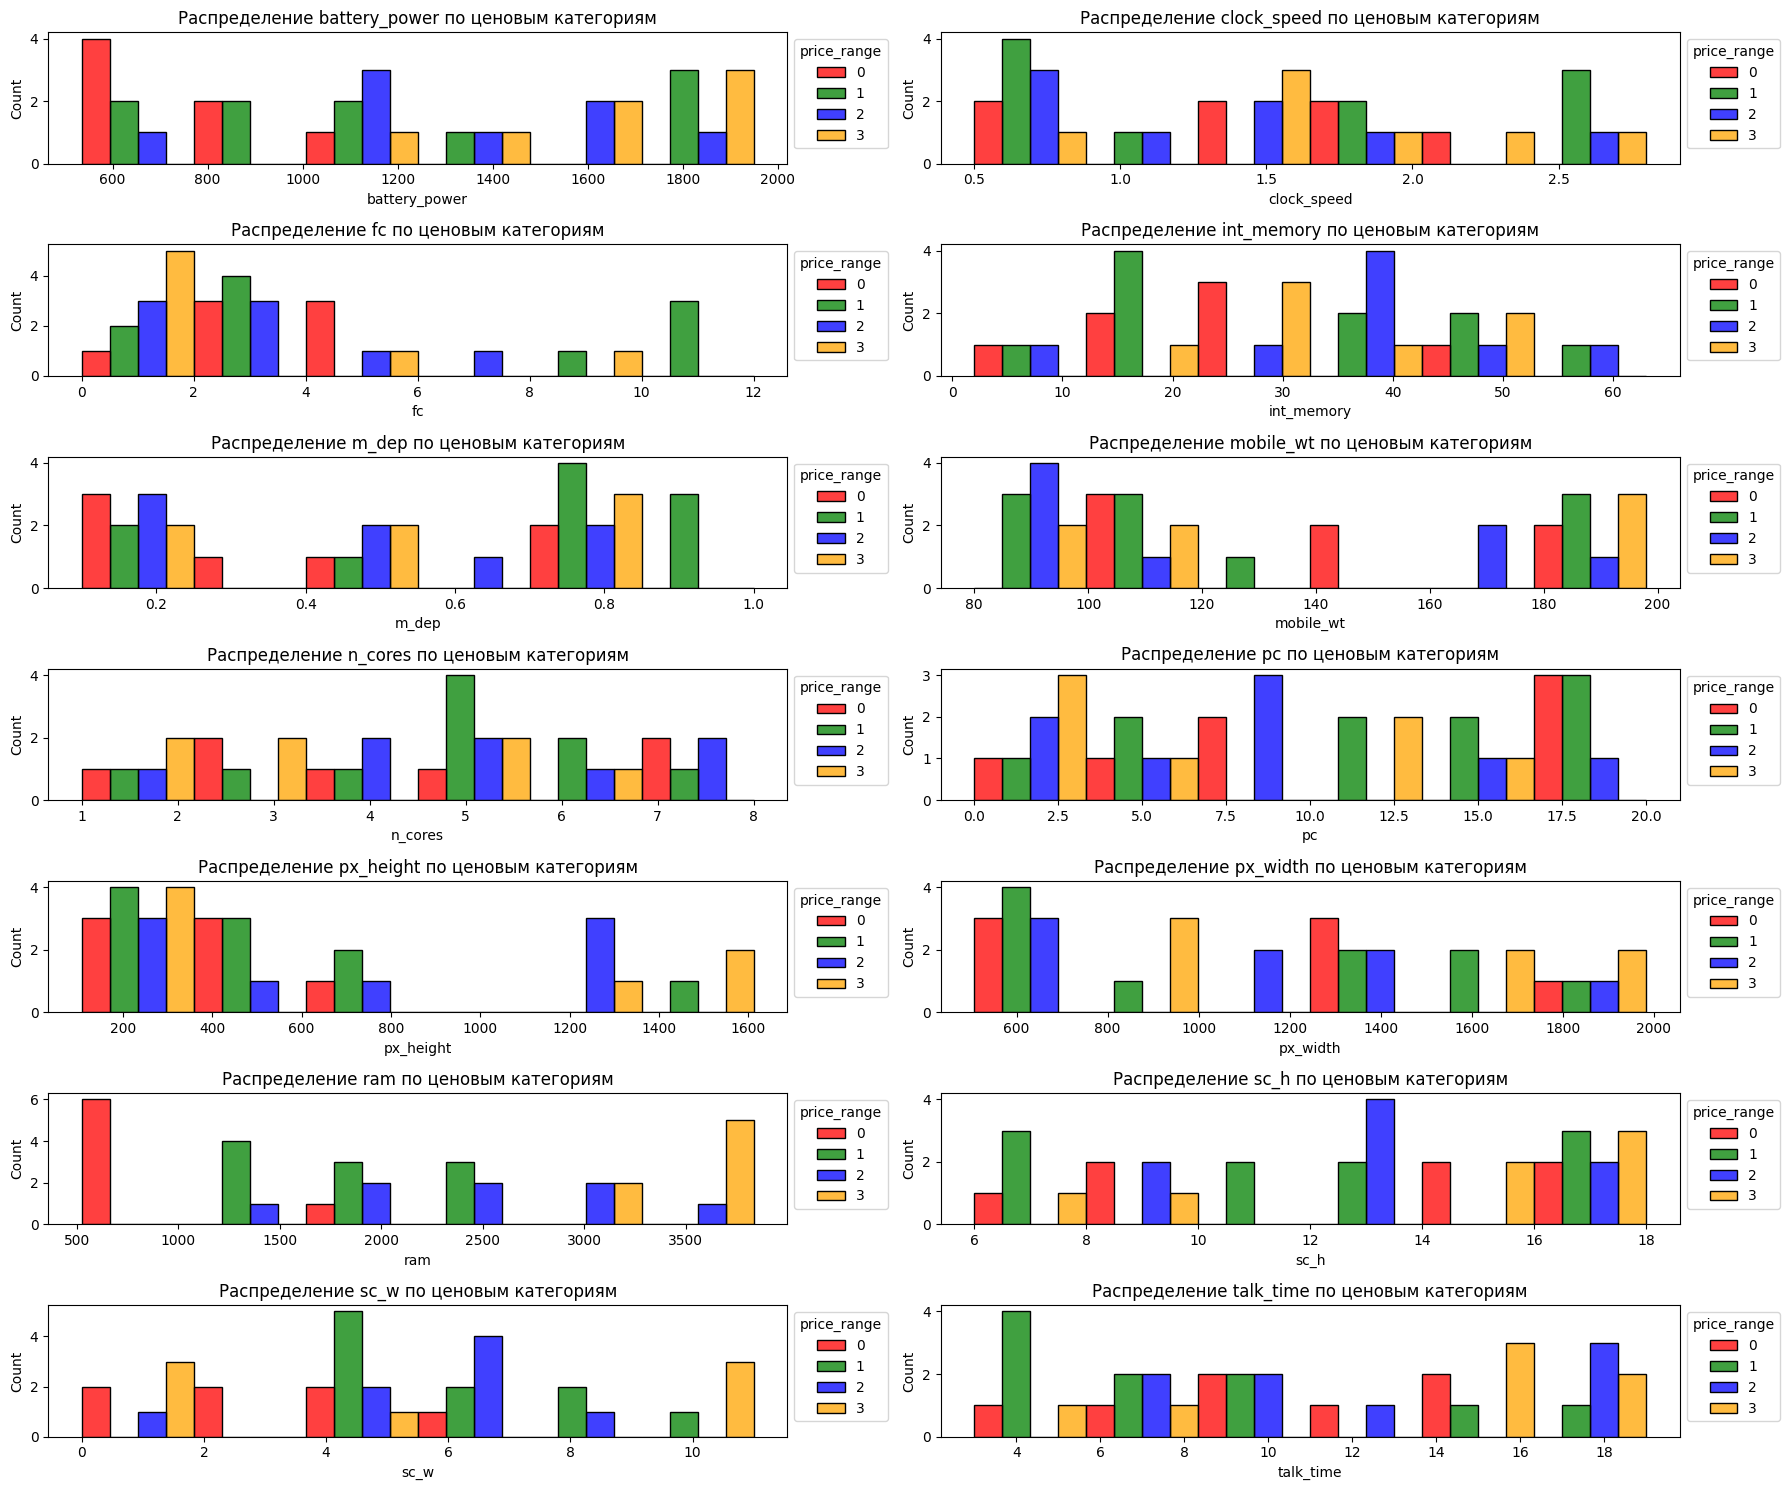

In [ ]:
n_rows = 2
n_cols, extra = divmod(len(research_features), n_rows)
if extra:
    n_cols += 1
fig, axes = plt.subplots(
    n_cols, n_rows, figsize=(9 * n_rows, 15)
)

for i, col in enumerate(research_features):
    i, j = divmod(i, n_rows)
    sns.histplot(
        x=cur_df[col],
        hue=cur_df['price_range'],
        ax=axes[i][j],
        palette={0: 'red', 1: 'green', 2: 'blue', 3: 'orange'},
        multiple='dodge')
    axes[i][j].set_title(f'Распределение {col} по ценовым категориям')
    sns.move_legend(axes[i][j], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('underline_dist.png')
plt.show()

### Вывод
Характеристикам низкофункциональных телефонов распределены без явных перевесов в сторону той или иной ценовой категории.

# Сохранение финального датасета

In [9]:
with open('../data/clean_data.pkl', 'wb') as f:
    pickle.dump(df, f)